<a href="https://colab.research.google.com/github/Kevinsamuelgitau/Netflix-movie-recommendation-model/blob/master/Netflix_movie_recommendation_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFINING THE ANALYTIC QUESTION

# a. SPECIFYING THE ANALYTIC QUESTION

The task is to create a model that recommends movies and TV shows to Netflix users based on history of selection

# b. DEFINING METRICS FOR SUCCESS

Our success will be marked by building a model that is highly accurate without overfitting/underfitting

# c. UNDERSTANDING THE CONTEXT

Our task is to study data collected from users through  Flixable which is a third-party Netflix search engine. Later, we will use the data to build a model which predicts movies and TV shows that a user is likely to watch, based on their history of selection

# d. RECORDING THE EXPERIMANTAL DESIGN

Here is the expected workflow of our project:
1. Data cleaning and preparation
*   Loading libraries and dataset
*   Dealing with missing values etc.
2. Performing EDA
*   Univariate analysis
3. Creating recommendation model
*word2vec model   





# e. DATA RELEVANCE

Here is a link to our dataset: https://www.kaggle.com/shivamb/netflix-shows

And glosary:

show_id- Unique ID for every Movie / Tv Show

type- Identifier - A Movie or TV Show

title- Title of the Movie / Tv Show

director- Director of the Movie

cast- Actors involved in the movie / show

country- Country where the movie / show was produced

date_added- Date it was added on Netflix

release_year- Actual Release year of the move / show

rating- TV Rating of the movie / show

duration- Total Duration - in minutes or number of seasons

listed_in	description

# IMPORTING LIBRARIES

In [ ]:
# Importing all libraries required for analysis
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
import math
pd.reset_option("^display")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING THE DATASET

In [ ]:
# Loading the dataset and previewing 
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
# checking the last records in the dataframe
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


# CHECKING THE DATA

In [ ]:
# checking number of records 
df.shape

(6234, 12)

In [ ]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
# checking general statistics of data
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


# CLEANING THE DATASET

In [ ]:
# We start by checking for null values in our dataset

df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# we drop director column because it has too many missing values
df.drop('director' , axis = 1, inplace = True)

In [ ]:
# Drop remaining null values from the dataset
# shape before droping the null values
print(df.shape)

# Droping null values
df_new =df.dropna()

#shape of the new dataset
df_new.shape
# we still have enough data to complete the analysis

(6234, 11)


(5256, 11)

In [ ]:
# to remove white spaces from our columns

df_new.columns = df_new.columns.str.strip().str.replace('','').str.lower()
df_new.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Remove white spaces from our rows 
# Convert cases of rows from upper case to lower case

column = ['type', 'title', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description']

for i, col in enumerate(column):
  df_new[col] = df_new[col].str.strip().str.replace(' ', ' ').str.lower()


In [ ]:
# Remove duplicated values

df_new.drop_duplicates(keep = 'first', inplace = True)


In [ ]:
df_new.duplicated().sum()

0

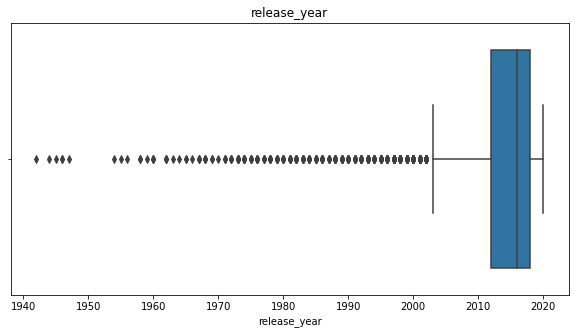

In [ ]:
# to check for outliers in the numerical 

numerical = ['release_year']
for i, j in enumerate(numerical):
  plt.figure(figsize=(10,5))
  plt.title(j)
  sns.boxplot(df_new[j])

# EDA

# UNIVARIATE ANALYSIS

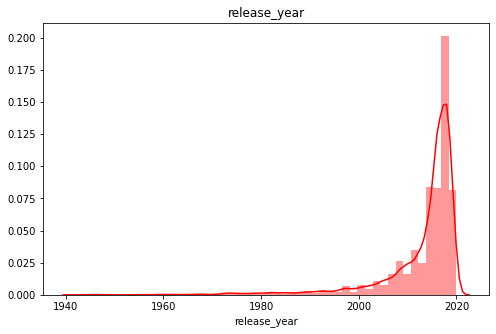

In [ ]:
# Plot histogram for numerical values

for i, j in enumerate(numerical):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.distplot(df_new[j], color='red', norm_hist=True)

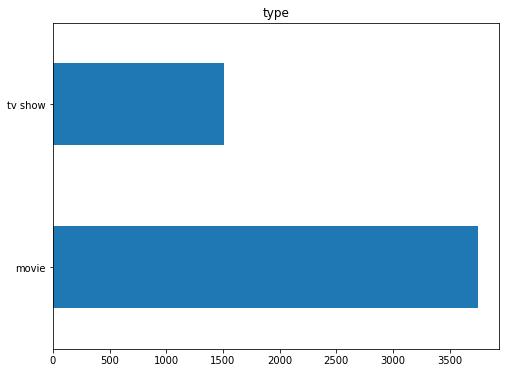

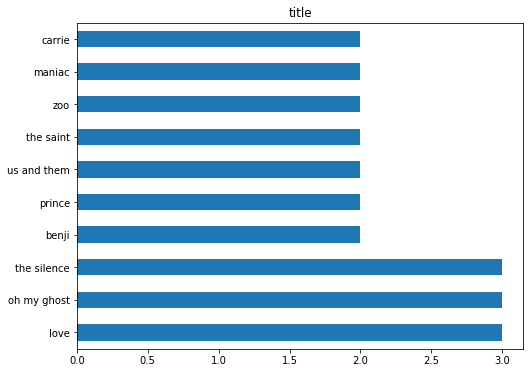

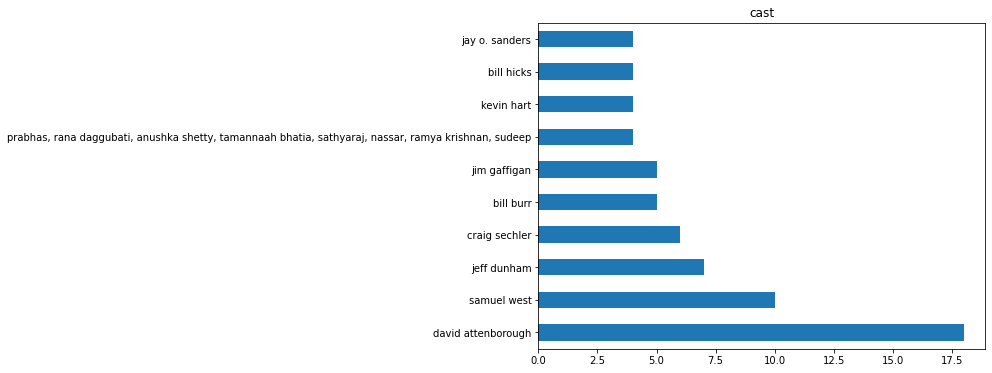

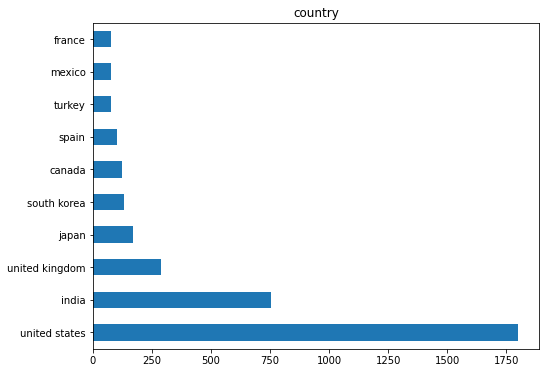

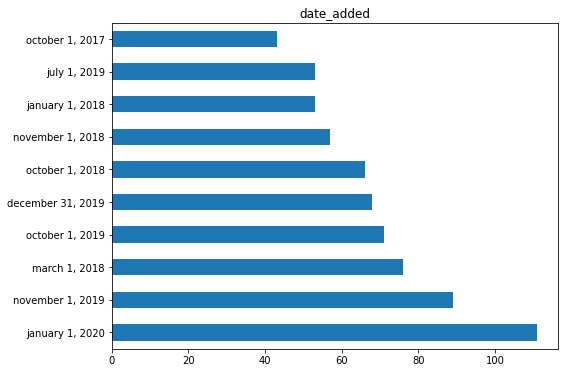

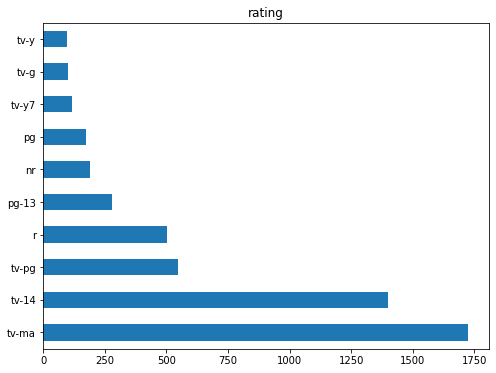

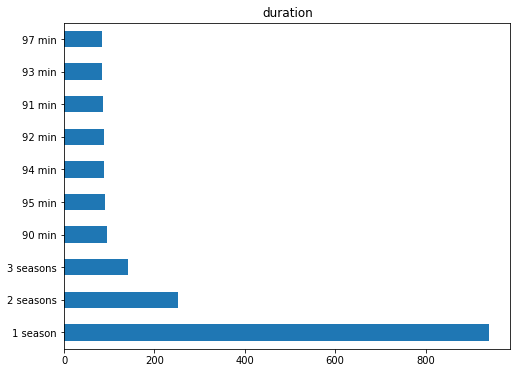

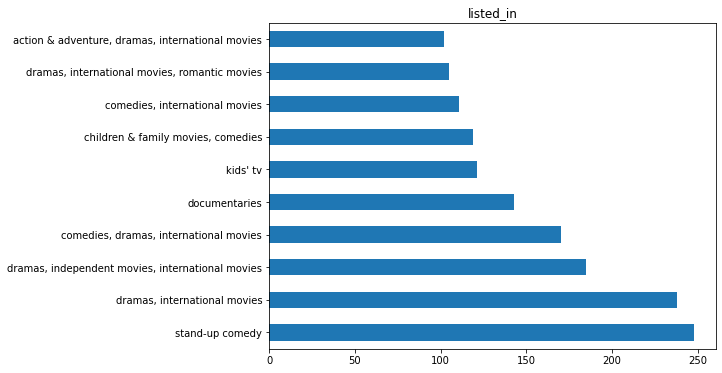

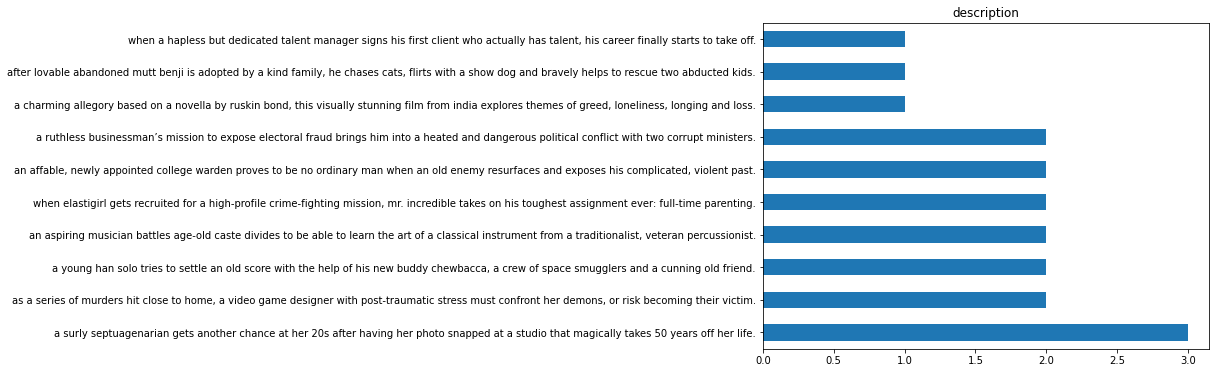

In [ ]:
# We will visulaize a Countplot of our Categorical Variables
for i,c in enumerate(column):
  
  plt.figure(figsize= (8,6))
  plt.title(c)
  df_new[c].value_counts()[:10].plot(kind = 'barh')

## CREATING RECOMMENDATION MODEL

#### WORD2VEC MODEL

In [ ]:
# Create a new column combining both title and type columns

df_new['type_title'] = df_new['type']+ " " + df_new['title']

# Create a new dataset with feature only

df_features = df_new[[ 'type', 'title', 'cast', 'country', 'date_added',
        'rating', 'duration', 'listed_in', 'description',
       'type_title']]
df_features.head(2)


,type,title,cast,country,date_added,rating,duration,listed_in,description,type_title
0,movie,norm of the north: king sized adventure,"alan marriott, andrew toth, brian dobson, cole...","united states, india, south korea, china","september 9, 2019",tv-pg,90 min,"children & family movies, comedies",before planning an awesome wedding for his gra...,movie norm of the north: king sized adventure
1,movie,jandino: whatever it takes,jandino asporaat,united kingdom,"september 9, 2016",tv-ma,94 min,stand-up comedy,jandino asporaat riffs on the challenges of ra...,movie jandino: whatever it takes


In [ ]:
# For each row in df_features, combine all columns into one

df_one = df_features.apply(lambda X: ','.join(X.astype(str)), axis = 1)
df_one.head()

0    movie,norm of the north: king sized adventure,...
1    movie,jandino: whatever it takes,jandino aspor...
2    tv show,transformers prime,peter cullen, sumal...
3    tv show,transformers: robots in disguise,will ...
4    movie,#realityhigh,nesta cooper, kate walsh, j...
dtype: object

In [ ]:
# Assign a name to the one column
df_clean = pd.DataFrame({'Clean': df_one})
df_clean.head(1)

,Clean
0,"movie,norm of the north: king sized adventure,..."


In [ ]:
# Create a list of list format of the df_clean for genism model

sent = [row.split(',') for row in df_clean['Clean']]
sent[:2]

[['movie',
  'norm of the north: king sized adventure',
  'alan marriott',
  ' andrew toth',
  ' brian dobson',
  ' cole howard',
  ' jennifer cameron',
  ' jonathan holmes',
  ' lee tockar',
  ' lisa durupt',
  ' maya kay',
  ' michael dobson',
  'united states',
  ' india',
  ' south korea',
  ' china',
  'september 9',
  ' 2019',
  'tv-pg',
  '90 min',
  'children & family movies',
  ' comedies',
  'before planning an awesome wedding for his grandfather',
  ' a polar bear king must take back a stolen artifact from an evil archaeologist first.',
  'movie norm of the north: king sized adventure'],
 ['movie',
  'jandino: whatever it takes',
  'jandino asporaat',
  'united kingdom',
  'september 9',
  ' 2016',
  'tv-ma',
  '94 min',
  'stand-up comedy',
  'jandino asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "sex on fire" in his comedy show.',
  'movie jandino: whatever it takes']]

In [ ]:
# Install genism library

!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [ ]:
# Import Genism and Word2vec alogorithm

from gensim.models import Word2Vec

# We train word2vec with our custom model as follows:

model = Word2Vec(sent, min_count=1, size=50, workers= 4, window= 4, sg = 1 )


In [ ]:
# Compute similarities between 'movie norm of the north: king sized adventure','movie jandino: whatever it takes'

model.similarity('movie norm of the north: king sized adventure','movie jandino: whatever it takes')

0.6395518

In [ ]:
# Create a unique dataframe using the newly created type_title column

unique = pd.DataFrame(df_features['type_title'].unique())
unique

,0
0,movie norm of the north: king sized adventure
1,movie jandino: whatever it takes
2,tv show transformers prime
3,tv show transformers: robots in disguise
4,movie #realityhigh
...,...
5222,tv show talking tom and friends
5223,tv show pokémon the series
5224,tv show justin time
5225,tv show terrace house: boys & girls in the city


In [ ]:
# Display vectors of tv show weeds

model['tv show weeds']

array([-0.00857777, -0.0002346 , -0.0058149 ,  0.01308709, -0.01440882,
        0.0041649 ,  0.00747025,  0.00179309, -0.00798032,  0.00252917,
        0.00242521,  0.0043897 ,  0.00364562, -0.01751436, -0.01119105,
       -0.01476898,  0.00256538,  0.0057332 , -0.00332131,  0.01284775,
        0.00367109,  0.00779399, -0.01061745, -0.00312793, -0.0154834 ,
       -0.0145678 ,  0.00096372, -0.00466901, -0.01950407,  0.01260837,
        0.01310699, -0.00580977, -0.01335454,  0.00049987, -0.00851793,
       -0.0172057 , -0.00948724,  0.01412682,  0.0001937 , -0.01411193,
       -0.01016585,  0.000216  ,  0.02210404, -0.02202478,  0.01094194,
        0.00260909,  0.00787905, -0.00246574,  0.0175798 ,  0.00676657],
      dtype=float32)

In [ ]:
# Get recommendations given an input

show = input(str('Enter The Show : '))

movie = model.most_similar( show , topn=5000)

movie = pd.DataFrame(movie, columns = {'type_title', 'Similarity'})
movie
movie = movie[movie['Similarity'].str.startswith(('movie', 'tv show'))]
print('\n')
print('Below are the top 5 Recomendations')
print('\n')
print(movie.head())

Enter The Show : tv show la casa de papel


Below are the top 5 Recomendations


                       Similarity  type_title
36                   tv show love    0.950864
40                tv show top boy    0.950274
89          tv show wild district    0.944849
116        tv show cannon busters    0.942640
125  tv show queen of no marriage    0.942195
